<a href="https://colab.research.google.com/github/ThiagoLozano/Alura_Imersao-de-Dados-2-Edicao/blob/main/Aula005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importa a Biblioteca Pandas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pega a fonte dos dados.
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Cria o objeto 'dados'.
dados = pd.read_csv(fonte)

In [3]:
# Cria uma lista com todas as Provas.
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

# Cria uma coluna para Nota Total das Provas.
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

# Retorna alunos que não tem o total de notas igual a 0.
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

In [4]:
# Caracteristiscas.
provas_entrada = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

# Tira as notas NaN.
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

# DataFrames (f(x) = y)
# x : Notas de Entrada.
# y: Notas de Saída.
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[prova_saida]

In [5]:
# f(x) = y
# x : Notas de Entrada.
# y: Notas de Saída.
x = notas_entrada
y = notas_saida

In [6]:
# Importa o método train_test_split da bilioteca Sklearn.
from sklearn.model_selection import train_test_split

# Recebe a nota de entrada e saída para Teste e Treino.
seed = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = seed)

In [7]:
# Modelo de Regressão
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = seed)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [8]:
# Predição do teste.
# Dados as 4 notas, ele tenta prever a 5 nota (de matemática).
print(modelo.predict(x_teste))

# Compara com o valor real das notas de matemática.
print(y_teste[:5])

[564.48610537 628.305027   509.98098555 ... 607.78717234 734.22766309
 466.91968988]
114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64


(-50.0, 1050.0)

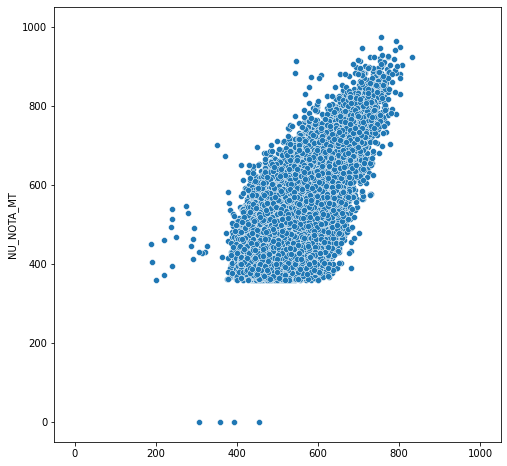

In [9]:
predicao_matematica = modelo.predict(x_teste)

# Retorna um gráfico de Disperção.
# y = Valores que foram previdos, x = Valores Reais.
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicao_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [10]:
# Cria um DataFrame para os dados coletados.
resultados = pd.DataFrame()
resultados['Real'] = y_teste
resultados['Previsao'] = predicao_matematica
resultados['Diferenca'] = resultados['Real'] - resultados['Previsao']
resultados['Quadrado_Diferenca'] = (resultados['Real'] - resultados['Previsao'])**2

resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [11]:
# Média da Quadrado da diferença.
resultados['Quadrado_Diferenca'].mean()

6604.415306219525

In [12]:
# Pontos de erros pra cima ou pra baixo.
resultados['Quadrado_Diferenca'].mean()**(1/2)

81.26755383435338

In [13]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [15]:
mean_squared_error(y_teste, predicao_matematica)

6604.415306219566

In [17]:
# Modelo de Regressão
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = seed)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


6604.415306219566

In [30]:
# Árvore de Decisões
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)

6058.967870162735

In [31]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()

In [32]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.7225495368075 - 7100.732779780728


In [33]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.74184239276 - 6250.793292491381


In [36]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5760.834451245899|Teste = 5815.707286597402


In [37]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419074|Teste = 6054.767567442071
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060743
Treino = 5469.677369145868|Teste = 5593.304363812442
Treino = 5369.458309852723|Teste = 5542.730565094406
Treino = 5276.16965707928|Teste = 5543.4809609730655
Treino = 5166.713159932668|Teste = 5608.854872163518
Treino = 5022.598049115693|Teste = 5763.155248722027
Treino = 4833.560706021637|Teste = 5960.052989742388
Treino = 4598.125022484774|Teste = 6216.545956232321
Treino = 4316.3791662866815|Teste = 6519.376217056128
Treino = 4000.6209880837496|Teste = 6849.577463417832
Treino = 3655.8197526274853|Teste = 7220.55475782693
Treino = 3295.832684540846|Teste = 7634.732578617249
Treino = 2931.7212612043877|Teste = 8068.112294631386
Treino = 2575.59534021339|Teste = 8449.25417707589
Treino = 2233.574203221172|Teste = 8830.85491

Desafio 01: Pesquisar sobre intervalo de confiança (Quem quiser discutir no Discord, estaremos lá)

Desafio 02: Testar com outros parâmetros da árvore de decisão

Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

Desafio 04: Pesquisar o que é o problema de underfit.

Desafio 05: Plotar um gráfico com test_score e train_test.